In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from cycler import cycler
%matplotlib inline

In [2]:
f = ppy.instrument.default_ngc3377_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model)

GPU acceleration not available. Continuing without.

In [3]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [4]:
sky = [126.9, 76.5]

In [5]:
# for i, Np in enumerate([3, 4, 5]):
#     for j, fm in enumerate([0.0, 0.25, 0.5]):
#         r = j + 3*i + 1
#         g.set_params(np.array([0.0, -1.5, Np, 9.8, 30.0]))
#         pcmd, _ = driv.simulate(g, 256, fudge_mag=fm, sky_noise=sky)
#         np.savetxt(f'../data/fudge_test/r{r}.pcmd', pcmd.T, fmt='%.9f')

In [6]:
data = {}
for i in range(1, 10):
    data[i] = np.loadtxt(f'../data/fudge_test/r{i}.pcmd', unpack=True)

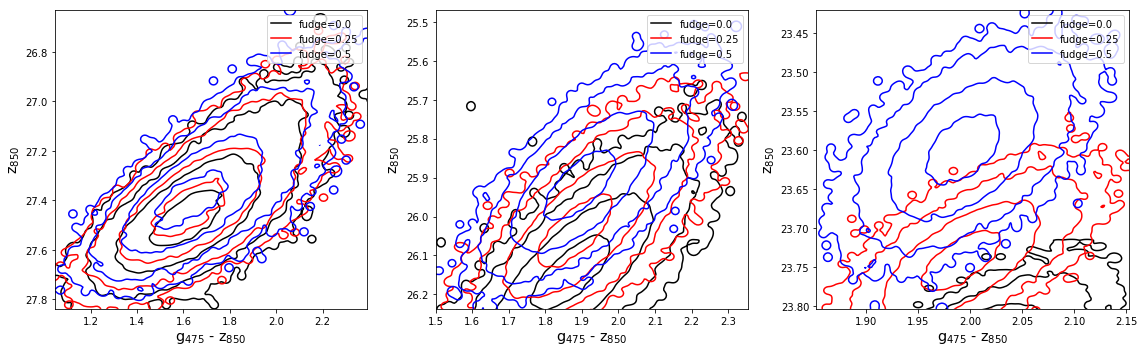

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
colors = ['k', 'r', 'b']
for i, Np in enumerate([3,4,5]):
    for j, fm in enumerate([0.0, 0.25, 0.5]):
        r = j + 3*i + 1
        ppy.plotting.plot_pcmd_contours(data[r], ax=axes[i], label=f'fudge={fm}', color=colors[j])
for a in axes:
    ppy.plotting.plot_isochrone(iso_model, axes=a)
    a.legend(loc=0)
plt.tight_layout()

In [8]:
results = {}
pcmds = {}
for i in range(1, 10):
    results[(i,1)] = ppy.results.ResultsPlotter(f'results/fudge_r{i}.csv', live_file=f'results/fudge_r{i}_live.csv')
    pcmds[(i,1)] = np.loadtxt(f'results/fudge_r{i}.pcmd', unpack=True)

In [9]:
for i in range(1, 10):
    results[(i,2)] = ppy.results.ResultsPlotter(f'results/fudge_m2_r{i}.csv', live_file=f'results/fudge_m2_r{i}_live.csv')
    try:
        pcmds[(i,2)] = np.loadtxt(f'results/fudge_m2_r{i}.pcmd', unpack=True)
    except:
        pass

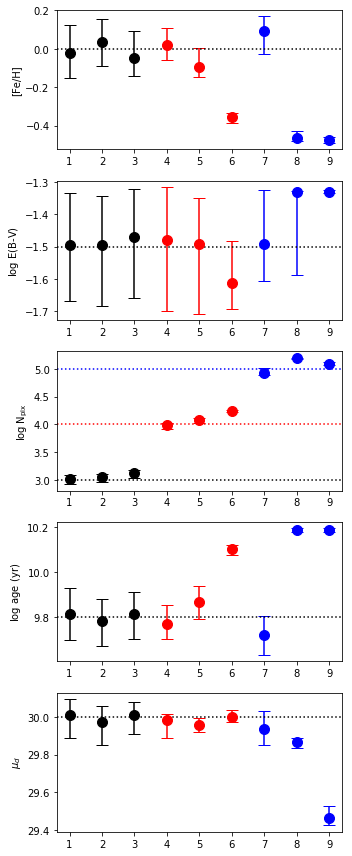

In [10]:
fig, axes = plt.subplots(nrows=5, figsize=(5, 12))
my_cycle = cycler(color=['k', 'k', 'k','r','r', 'r', 'b','b','b'])
for a in axes:
    a.set_prop_cycle(my_cycle)
for i in range(1, 10):
    r = results[(i,1)]
    r.plot_errorbars(axes, x=i)
for i,a in enumerate(axes):
    a.set_ylabel(results[(1,1)].labels[i])
axes[0].axhline(y=0., ls=':', color='k')
axes[1].axhline(y=-1.5, ls=':', color='k')
axes[2].axhline(y=3.0, ls=':', color='k')
axes[2].axhline(y=4.0, ls=':', color='r')
axes[2].axhline(y=5.0, ls=':', color='b')
axes[3].axhline(y=9.8, ls=':', color='k')
axes[4].axhline(y=30.0, ls=':', color='k')
plt.tight_layout()

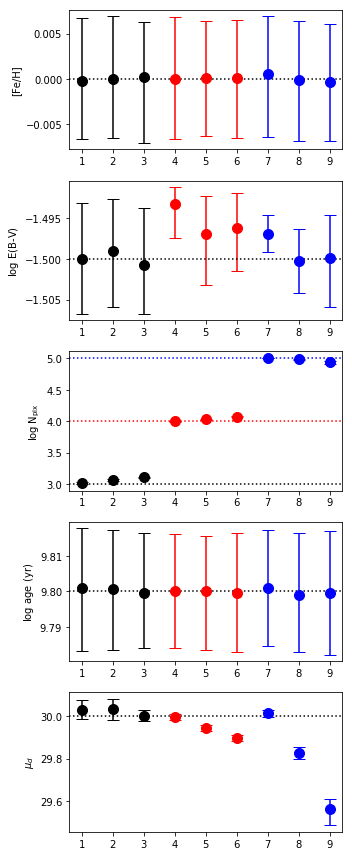

In [11]:
fig, axes = plt.subplots(nrows=5, figsize=(5, 12))
my_cycle = cycler(color=['k', 'k', 'k','r','r', 'r', 'b','b','b'])
for a in axes:
    a.set_prop_cycle(my_cycle)
for i in range(1, 10):
    r = results[(i,2)]
    r.plot_errorbars(axes, x=i)
for i,a in enumerate(axes):
    a.set_ylabel(results[(1,2)].labels[i])
axes[0].axhline(y=0., ls=':', color='k')
axes[1].axhline(y=-1.5, ls=':', color='k')
axes[2].axhline(y=3.0, ls=':', color='k')
axes[2].axhline(y=4.0, ls=':', color='r')
axes[2].axhline(y=5.0, ls=':', color='b')
axes[3].axhline(y=9.8, ls=':', color='k')
axes[4].axhline(y=30.0, ls=':', color='k')
plt.tight_layout()

KeyError: 1

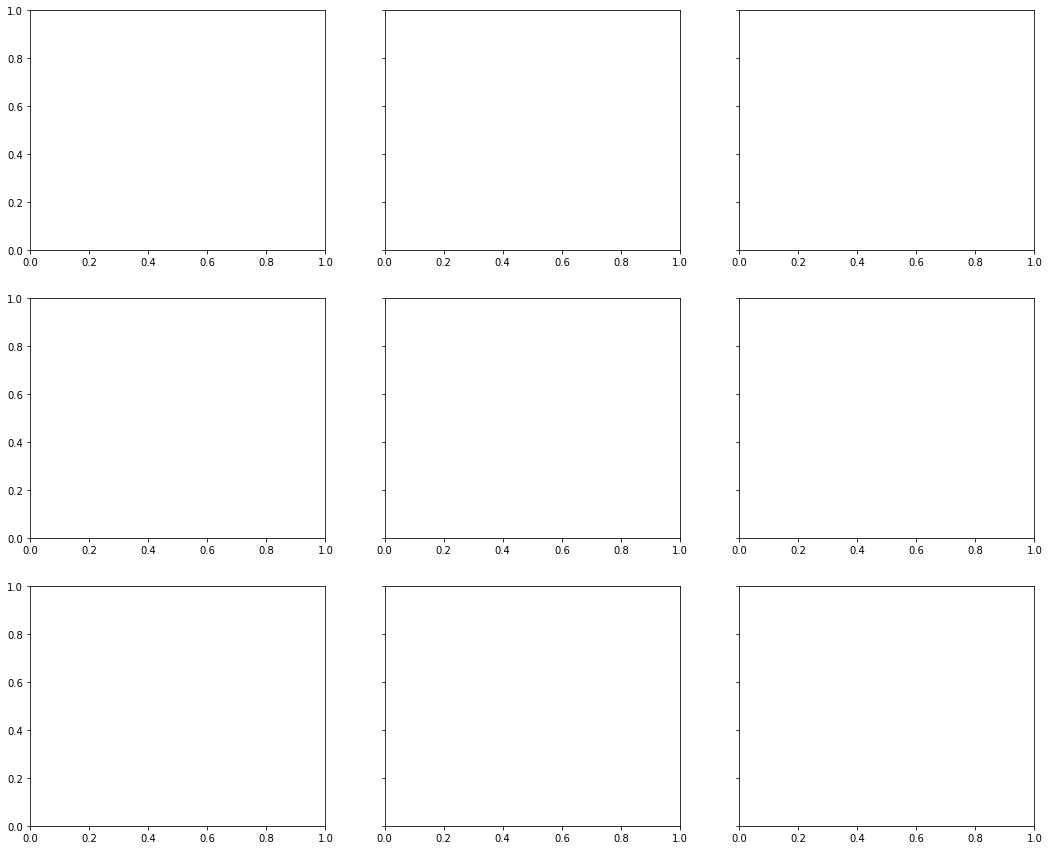

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=3, sharex='row', sharey='row', figsize=(18, 15))
axes = axes.flatten()
for i, a in enumerate(axes):
    ppy.plotting.plot_pcmd_contours(pcmds[i+1], ax=a, color='b', label='Model', keep_limits=False)
    ppy.plotting.plot_pcmd_contours(data[i+1], ax=a, color='k', alpha=0.5, label='Data', keep_limits=True)
    ppy.plotting.plot_isochrone(iso_model, axes=a)
axes[0].set_xlim([1., 2.5])
axes[0].set_ylim([28, 26.5])
# axes[3].set_xlim([1., 2.5])
axes[3].set_ylim([26.5, 25.4])
# axes[6].set_xlim([1., 2.5])
axes[6].set_ylim([24.05, 23.4])
axes[0].set_title('Fudge: 0.0 mags')
axes[1].set_title('Fudge: 0.25 mags')
axes[2].set_title('Fudge: 0.5 mags')
plt.tight_layout()

In [ ]:
g.set_params(np.array([0.3, -2., 4., 10., 30.0]))
pcmd_0, _ = driv.simulate(g, 256)

In [28]:
g.set_params(np.array([0., -2., 4., 10., 30.0]))
pcmd_1, _ = driv.simulate(g, 256)

In [34]:
g.set_params(np.array([-0.3, -2., 4., 10., 30.0]))
pcmd_2, _ = driv.simulate(g, 256)

In [35]:
np.std(pcmd_0, axis=-1)

array([0.12136771, 0.15272257], dtype=float32)

In [36]:
np.std(pcmd_1, axis=-1)

array([0.12873036, 0.14469716], dtype=float32)

In [37]:
np.std(pcmd_2, axis=-1)

array([0.1353759 , 0.13823037], dtype=float32)

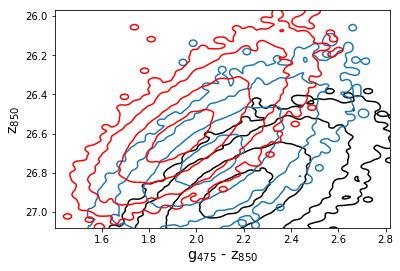

In [38]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd_0, ax=ax, color='k')
ppy.plotting.plot_pcmd_contours(pcmd_1, ax=ax)
ppy.plotting.plot_pcmd_contours(pcmd_2, ax=ax, color='r')
ppy.plotting.plot_isochrone(iso_model, axes=ax)

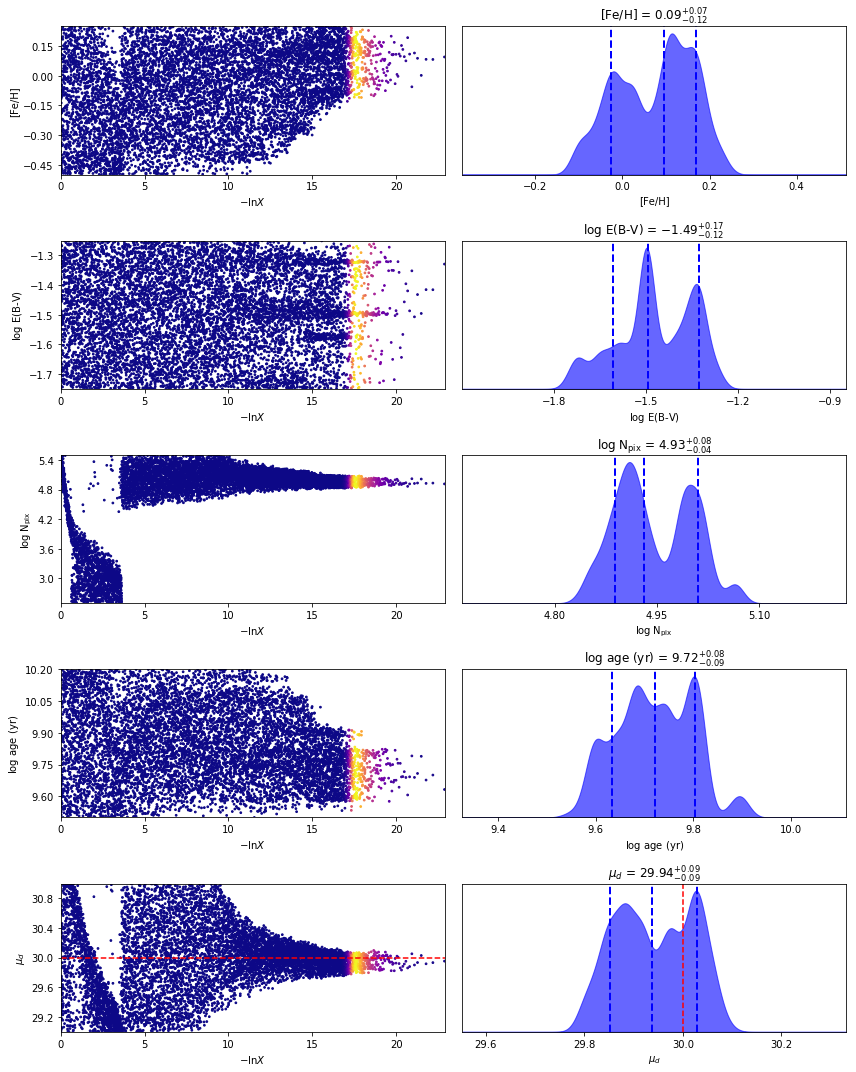

In [10]:
fig, axes = results[7].plot_trace();
axes[-1,0].axhline(y=30.0, ls='--', color='r')
axes[-1,1].axvline(x=30.0, ls='--', color='r')
plt.tight_layout()

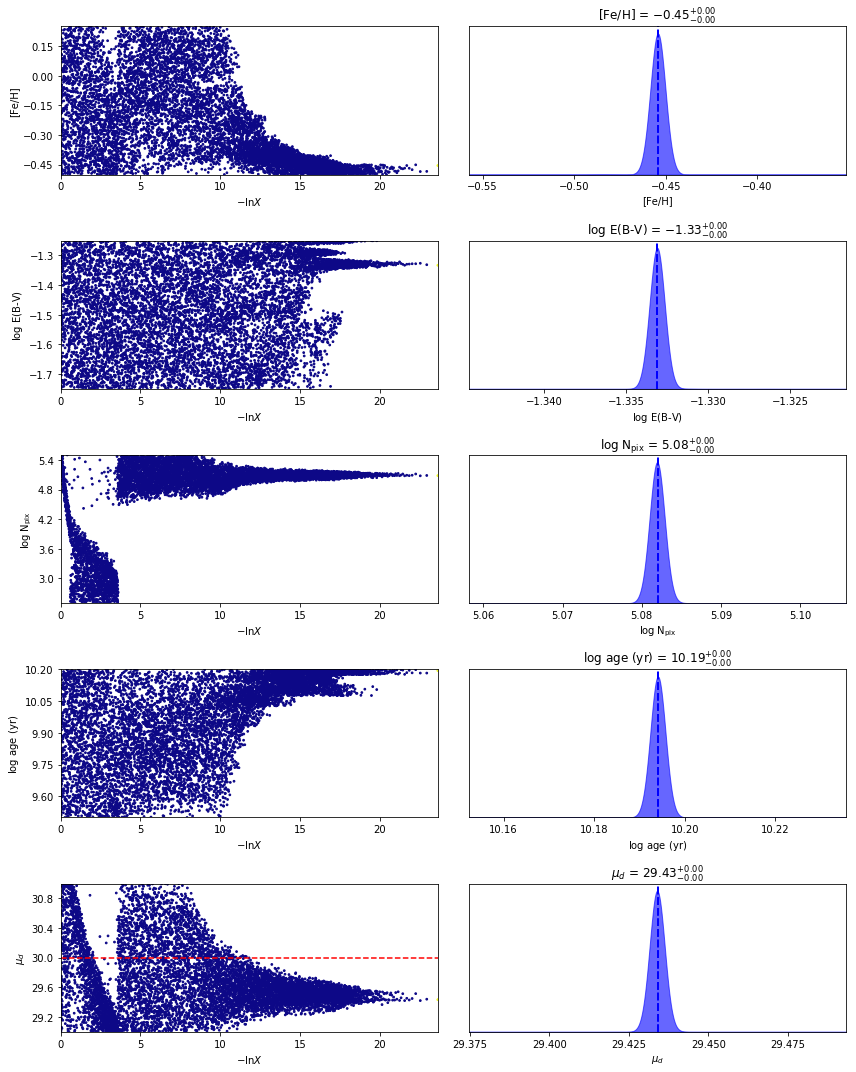

In [11]:
fig, axes = results[9].plot_trace();
axes[-1,0].axhline(y=30.0, ls='--', color='r')
axes[-1,1].axvline(x=30.0, ls='--', color='r')
plt.tight_layout()